# Dynamic Averaging with SVD and Loss Results

## Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

rc('text', usetex=True)

%matplotlib inline

## Non-IID and IID

### Mnist

In [3]:
mnist_fed = pd.read_csv("../data/output/mnist-noniid.csv")
mnist_avg = pd.read_csv("../data/output/mnist-avg.csv")

In [4]:
mnist_fed.head()

,N_WORKERS,COMM_PERIOD,OVERLAP,COMM_MODE,AGG_MODE,NONIID,UNBALANCED,TIME,ACCURACY
0,128,1,0.0,0,0,0,0,46.962904,87.05
1,128,1,0.0,0,0,0,1,49.405476,87.12
2,128,1,0.0,0,0,1,0,47.189411,86.90
3,128,1,0.0,0,0,1,1,48.217714,85.78
4,128,1,0.0,0,2,0,0,49.194191,87.05


In [5]:
mnist_avg.head()

,N_WORKERS,COMM_PERIOD,OVERLAP,COMM_MODE,AGG_MODE,NONIID,UNBALANCED,TIME,ACCURACY
0,128,1,0.0,0,0,0,0,46.962904,87.05
1,128,10,0.0,0,0,0,0,14.321549,86.99
2,128,20,0.0,0,0,0,0,12.263984,86.95
3,128,50,0.0,0,0,0,0,11.459953,86.66
4,128,100,0.0,0,0,0,0,11.024461,86.24


#### IID and balanced

##### Time

In [9]:
t_ib_avg_piv = mnist_avg.query('AGG_MODE == 0 and NONIID == 0 and UNBALANCED == 0').pivot_table(values="TIME", index="N_WORKERS", columns=['COMM_PERIOD'])
t_ib_avg_piv

COMM_PERIOD,1,10,20,50,100
N_WORKERS,,,,,
8,80.284260,67.634710,67.073928,66.709684,68.440570
32,38.725822,26.163773,23.818460,23.179106,22.945643
64,34.593874,17.818068,16.218274,15.012941,14.756710
128,46.962904,14.321549,12.263984,11.459953,11.024461


In [10]:
t_ib_piv = mnist_fed.query('AGG_MODE == 2 and NONIID == 0 and UNBALANCED == 0').pivot_table(values="TIME", index="N_WORKERS", columns=['COMM_MODE'])
t_ib_piv

COMM_MODE,0,1,2
N_WORKERS,,,
8,81.881099,87.658831,83.030932
32,41.194082,38.672567,40.201955
64,38.627704,31.959041,33.554338
128,49.194191,36.703425,40.028122


In [11]:
t_ib_merged = pd.concat([t_ib_piv, t_ib_avg_piv.iloc[:, 1:]], axis=1)
t_ib_merged.columns = [
    r'FedAvg, $\rho=1$', r'DynAvg SVD', r'DynAvgLoss', r'FedAvg, $\rho=10$',
    r'FedAvg, $\rho=20$', r'FedAvg, $\rho=50$', r'FedAvg, $\rho=100$'
]
t_ib_merged.index.name = 'No. of workers'
# .plot()

##### Accuracy

In [13]:
acc_ib_avg_piv = mnist_avg.query('AGG_MODE == 0 and NONIID == 0 and UNBALANCED == 0').pivot_table(values="ACCURACY", index="N_WORKERS", columns=['COMM_PERIOD'])
acc_ib_avg_piv

COMM_PERIOD,1,10,20,50,100
N_WORKERS,,,,,
8,91.26,91.26,91.28,91.28,91.30
32,89.58,89.56,89.53,89.49,89.39
64,88.44,88.43,88.40,88.26,88.02
128,87.05,86.99,86.95,86.66,86.24


In [14]:
acc_ib_piv = mnist_fed.query('AGG_MODE == 2 and NONIID == 0 and UNBALANCED == 0').pivot_table(values="ACCURACY", index="N_WORKERS", columns=['COMM_MODE'])
acc_ib_piv

COMM_MODE,0,1,2
N_WORKERS,,,
8,91.26,91.02,91.20
32,89.58,89.46,89.51
64,88.42,88.25,88.33
128,87.05,86.77,86.98


In [15]:
acc_ib_merged_piv = pd.concat([acc_ib_piv, acc_ib_avg_piv.iloc[:, 1:]], axis=1)
acc_ib_merged_piv.columns = [
    r'FedAvg, $\rho=1$', r'DynAvg SVD', r'DynAvgLoss', r'FedAvg, $\rho=10$',
    r'FedAvg, $\rho=20$', r'FedAvg, $\rho=50$', r'FedAvg, $\rho=100$'
]
acc_ib_merged_piv.index.name = 'No. of workers'

In [75]:
# ax = acc_ib_merged_piv.plot(figsize=(12, 8))
# ax.set_ylabel('Wall time (s)', fontdict=dict(fontsize=12))
# ax.set_xlabel('No. of workers', fontdict=dict(fontsize=12))

#### Non-IID and Balanced

###### Time

In [19]:
t_nb_avg_piv = mnist_avg.query('AGG_MODE == 0 and NONIID == 1 and UNBALANCED == 0').pivot_table(values="TIME", index="N_WORKERS", columns=['COMM_PERIOD'])
t_nb_avg_piv

N_WORKERS


In [57]:
t_nb_piv = mnist_fed.query('AGG_MODE == 2 and NONIID == 1 and UNBALANCED == 0').pivot_table(values="TIME", index="N_WORKERS", columns=['COMM_MODE'])
t_nb_piv

COMM_MODE,0,1,2
N_WORKERS,,,
8,81.459455,86.744400,81.845792
32,37.516938,38.448068,38.069741
64,37.667752,31.473764,NaN
128,49.817912,37.206544,38.863762


In [69]:
cols = [
    r'FedAvg, $\rho=1$',
    r'FedAvg, $\rho=10$', r'FedAvg, $\rho=20$',
    r'FedAvg, $\rho=50$', r'FedAvg, $\rho=100$'
]
index = [8, 32, 64, 128]
t_nb_avg_piv = pd.DataFrame(np.tile(np.nan, (4, 5)), index=index, columns=cols)

In [70]:
t_nb_avg_piv

,"FedAvg, $\rho=1$","FedAvg, $\rho=10$","FedAvg, $\rho=20$","FedAvg, $\rho=50$","FedAvg, $\rho=100$"
8,NaN,NaN,NaN,NaN,NaN
32,NaN,NaN,NaN,NaN,NaN
64,NaN,NaN,NaN,NaN,NaN
128,NaN,NaN,NaN,NaN,NaN


In [71]:
t_nb_merged = pd.concat([t_nb_piv, t_nb_avg_piv.iloc[:, 1:]], axis=1)
t_nb_merged.columns = [
    r'FedAvg, $\rho=1$', r'DynAvg SVD', r'DynAvgLoss', r'FedAvg, $\rho=10$',
    r'FedAvg, $\rho=20$', r'FedAvg, $\rho=50$', r'FedAvg, $\rho=100$'
]
t_nb_merged.index.name = 'No. of workers'

##### Accuracy

In [79]:
cols = [
    r'FedAvg, $\rho=1$',
    r'FedAvg, $\rho=10$', r'FedAvg, $\rho=20$',
    r'FedAvg, $\rho=50$', r'FedAvg, $\rho=100$'
]
index = [8, 32, 64, 128]
acc_nb_avg_piv = pd.DataFrame(np.tile(np.nan, (4, 5)), index=index, columns=cols)

In [80]:
acc_nb_avg_piv

,"FedAvg, $\rho=1$","FedAvg, $\rho=10$","FedAvg, $\rho=20$","FedAvg, $\rho=50$","FedAvg, $\rho=100$"
8,NaN,NaN,NaN,NaN,NaN
32,NaN,NaN,NaN,NaN,NaN
64,NaN,NaN,NaN,NaN,NaN
128,NaN,NaN,NaN,NaN,NaN


In [78]:
acc_nb_piv = mnist_fed.query('AGG_MODE == 2 and NONIID == 1 and UNBALANCED == 0').pivot_table(values="ACCURACY", index="N_WORKERS", columns=['COMM_MODE'])
acc_nb_piv

COMM_MODE,0,1,2
N_WORKERS,,,
8,88.89,72.07,87.15
32,88.42,86.50,88.41
64,87.74,86.18,NaN
128,87.01,84.37,86.79


In [81]:
acc_nb_merged = pd.concat([acc_nb_piv, acc_nb_avg_piv.iloc[:, 1:]], axis=1)
acc_nb_merged.columns = [
    r'FedAvg, $\rho=1$', r'DynAvg SVD', r'DynAvgLoss', r'FedAvg, $\rho=10$',
    r'FedAvg, $\rho=20$', r'FedAvg, $\rho=50$', r'FedAvg, $\rho=100$'
]
acc_nb_merged.index.name = 'No. of workers'

#### Non-IID and Unbalanced

##### Time

In [89]:
cols = [
    r'FedAvg, $\rho=1$',
    r'FedAvg, $\rho=10$', r'FedAvg, $\rho=20$',
    r'FedAvg, $\rho=50$', r'FedAvg, $\rho=100$'
]
index = [8, 32, 64, 128]
t_nu_avg_piv = pd.DataFrame(np.tile(np.nan, (4, 5)), index=index, columns=cols)

In [90]:
t_nu_avg_piv

,"FedAvg, $\rho=1$","FedAvg, $\rho=10$","FedAvg, $\rho=20$","FedAvg, $\rho=50$","FedAvg, $\rho=100$"
8,NaN,NaN,NaN,NaN,NaN
32,NaN,NaN,NaN,NaN,NaN
64,NaN,NaN,NaN,NaN,NaN
128,NaN,NaN,NaN,NaN,NaN


In [91]:
t_nu_piv = mnist_fed.query('AGG_MODE == 2 and NONIID == 1 and UNBALANCED == 1').pivot_table(values="TIME", index="N_WORKERS", columns=['COMM_MODE'])
t_nu_piv

COMM_MODE,0,1
N_WORKERS,,
8,82.487672,84.261614
32,66.200025,42.777518
64,48.304776,42.121617
128,50.305207,40.597429


In [97]:
t_nu_merged = pd.concat([t_nu_piv, t_nu_avg_piv.iloc[:, 1:]], axis=1)
# For now adding DynAvgLoss column
t_nu_merged.insert(2, 'DynAvg SVD', np.nan)
t_nu_merged.columns = [
    r'FedAvg, $\rho=1$', r'DynAvg SVD', r'DynAvgLoss', r'FedAvg, $\rho=10$',
    r'FedAvg, $\rho=20$', r'FedAvg, $\rho=50$', r'FedAvg, $\rho=100$'
]
t_nu_merged.index.name = 'No. of workers'

##### Accuracy

In [102]:
cols = [
    r'FedAvg, $\rho=1$',
    r'FedAvg, $\rho=10$', r'FedAvg, $\rho=20$',
    r'FedAvg, $\rho=50$', r'FedAvg, $\rho=100$'
]
index = [8, 32, 64, 128]
acc_nu_avg_piv = pd.DataFrame(np.tile(np.nan, (4, 5)), index=index, columns=cols)

In [103]:
acc_nu_piv = mnist_fed.query('AGG_MODE == 2 and NONIID == 1 and UNBALANCED == 1').pivot_table(values="ACCURACY", index="N_WORKERS", columns=['COMM_MODE'])
acc_nu_piv

COMM_MODE,0,1
N_WORKERS,,
8,82.62,83.36
32,84.89,86.18
64,87.49,87.07
128,85.72,85.67


In [104]:
acc_nu_merged = pd.concat([acc_nu_piv, acc_nu_avg_piv.iloc[:, 1:]], axis=1)
# For now adding DynAvgLoss column
acc_nu_merged.insert(2, 'DynAvg SVD', np.nan)
acc_nu_merged.columns = [
    r'FedAvg, $\rho=1$', r'DynAvg SVD', r'DynAvgLoss', r'FedAvg, $\rho=10$',
    r'FedAvg, $\rho=20$', r'FedAvg, $\rho=50$', r'FedAvg, $\rho=100$'
]
acc_nu_merged.index.name = 'No. of workers'

#### IID and Unbalanced

##### Time

In [109]:
cols = [
    r'FedAvg, $\rho=1$',
    r'FedAvg, $\rho=10$', r'FedAvg, $\rho=20$',
    r'FedAvg, $\rho=50$', r'FedAvg, $\rho=100$'
]
index = [8, 32, 64, 128]
t_iu_avg_piv = pd.DataFrame(np.tile(np.nan, (4, 5)), index=index, columns=cols)

In [110]:
t_iu_piv = mnist_fed.query('AGG_MODE == 2 and NONIID == 0 and UNBALANCED == 1').pivot_table(values="TIME", index="N_WORKERS", columns=['COMM_MODE'])
t_iu_piv

COMM_MODE,0,1,2
N_WORKERS,,,
8,82.874970,86.257621,81.555400
32,44.019518,42.376728,NaN
64,44.663810,41.999761,33.151042
128,46.664180,40.502376,NaN


In [113]:
t_iu_merged = pd.concat([t_iu_piv, t_iu_avg_piv.iloc[:, 1:]], axis=1)
t_iu_merged.columns = [
    r'FedAvg, $\rho=1$', r'DynAvg SVD', r'DynAvgLoss', r'FedAvg, $\rho=10$',
    r'FedAvg, $\rho=20$', r'FedAvg, $\rho=50$', r'FedAvg, $\rho=100$'
]
t_iu_merged.index.name = 'No. of workers'

##### Accuracy

In [117]:
cols = [
    r'FedAvg, $\rho=1$',
    r'FedAvg, $\rho=10$', r'FedAvg, $\rho=20$',
    r'FedAvg, $\rho=50$', r'FedAvg, $\rho=100$'
]
index = [8, 32, 64, 128]
acc_iu_avg_piv = pd.DataFrame(np.tile(np.nan, (4, 5)), index=index, columns=cols)

In [118]:
acc_iu_piv = mnist_fed.query('AGG_MODE == 2 and NONIID == 0 and UNBALANCED == 1').pivot_table(values="ACCURACY", index="N_WORKERS", columns=['COMM_MODE'])
acc_iu_piv

COMM_MODE,0,1,2
N_WORKERS,,,
8,91.25,91.44,91.23
32,89.56,90.02,NaN
64,88.62,88.99,88.49
128,87.12,88.38,NaN


In [119]:
acc_iu_merged = pd.concat([acc_iu_piv, acc_iu_avg_piv.iloc[:, 1:]], axis=1)
acc_iu_merged.columns = [
    r'FedAvg, $\rho=1$', r'DynAvg SVD', r'DynAvgLoss', r'FedAvg, $\rho=10$',
    r'FedAvg, $\rho=20$', r'FedAvg, $\rho=50$', r'FedAvg, $\rho=100$'
]
acc_iu_merged.index.name = 'No. of workers'

### Wall time analysis

Text(0.5, 0.98, 'Wall Time Analysis')

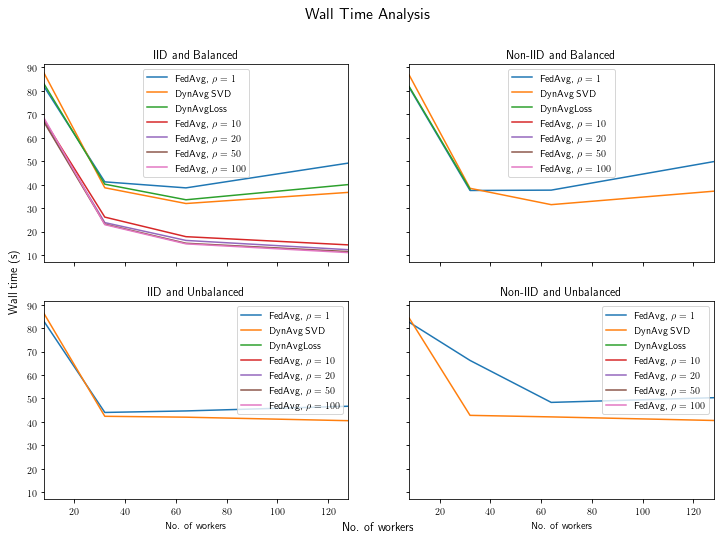

In [114]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharey=True, sharex=True)
# add a big axes, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
# IID and Balanced
t_ib_merged.plot(ax=axes[0, 0])
# axes[0, 0].set_ylabel('Wall time (s)', fontdict=dict(fontsize=12))
axes[0, 0].set_title('IID and Balanced')

# Non IID and Balanced
t_nb_merged.plot(ax=axes[0, 1])
axes[0, 1].set_title('Non-IID and Balanced')

# IID and Unbalanced
t_iu_merged.plot(ax=axes[1, 0])
axes[1, 0].set_title('IID and Unbalanced')

# Non IID and Unbalanced
t_nu_merged.plot(ax=axes[1, 1])
axes[1, 1].set_title('Non-IID and Unbalanced')

plt.ylabel('Wall time (s)', fontdict=dict(fontsize=12))
plt.xlabel('No. of workers', fontdict=dict(fontsize=12))
plt.suptitle('Wall Time Analysis', fontsize=16)
# plt.savefig('../reports/figures/time-iid-balanced.png', dpi=500, format='png')

### Accuracy analysis

Text(0.5, 0.98, 'Accuracy Analysis')

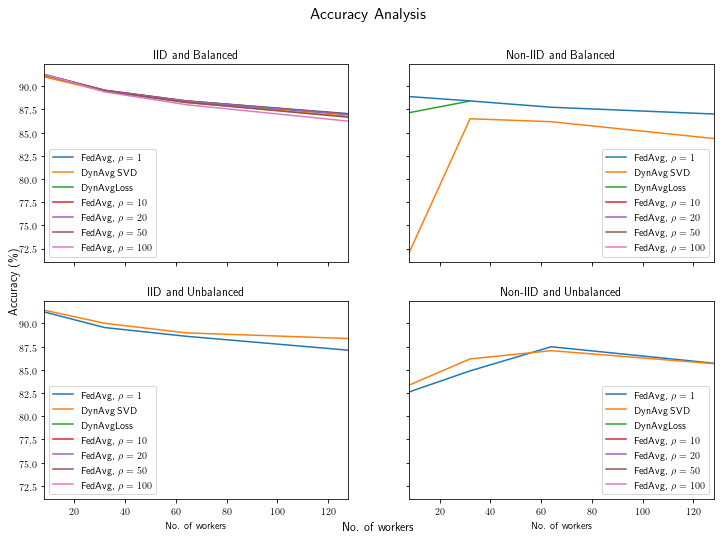

In [120]:
fig2, axes2 = plt.subplots(2, 2, figsize=(12, 8), sharey=True, sharex=True)
# add a big axes, hide frame
fig2.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)

# IID and balanced
acc_ib_merged_piv.plot(ax=axes2[0, 0])
axes2[0, 0].set_title('IID and Balanced')

# Non-IID and balanced
acc_nb_merged.plot(ax=axes2[0, 1])
axes2[0, 1].set_title('Non-IID and Balanced')

# IID and Unbalanced
acc_iu_merged.plot(ax=axes2[1, 0])
axes2[1, 0].set_title('IID and Unbalanced')

# Non-IID and Unbalanced
acc_nu_merged.plot(ax=axes2[1, 1])
axes2[1, 1].set_title('Non-IID and Unbalanced')

plt.ylabel('Accuracy (\%)', fontdict=dict(fontsize=12))
plt.xlabel('No. of workers', fontdict=dict(fontsize=12))
plt.suptitle(r'Accuracy Analysis', fontsize=16)
# plt.savefig('../reports/figures/time-iid-balanced.png', dpi=500, format='png')